----
Python Exercises
----

## Part 1:

## Video Game Sales

We have a file with video game sales data with the following columns:

- Ranking: Ranking of the sale of the video game worldwide
- Name: Name of the video game
- Platform: Platform on which it was launched (Wii, PS4, PC ... et)
- Year: Launch year
- Genre: Video game genre
- Publisher: Company that published the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Worldwide Sales (in millions)


Loading the dataset:

In [ ]:
import pandas as pd
from scipy import stats

games = pd.read_excel('/Users/javiervillanueva/Downloads/vgsales.xlsx')

games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Finding the video game that has generated the most revenue globally

In [ ]:
games.sort_values('Global_Sales', ascending=False).head(1)["Name"]

0    Wii Sports
Name: Name, dtype: object

### Finding the platform with the most average global sales

In [ ]:
plataformas = games.groupby('Platform')
plataformas.mean().sort_values('Global_Sales', ascending=False).head(1)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,
GB,3392.030612,1995.958763,1.166531,0.487959,0.868571,0.083673,2.606633


### Finding the publisher with the most global sales

In [ ]:
empresas = games.groupby('Publisher')
empresas.sum().sort_values('Global_Sales', ascending=False).head(1)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
Nintendo,2714164,1394666.0,816.87,418.74,455.42,95.33,1786.56


### Discovering which year had the most global sales

In [ ]:
años = games.groupby('Year')
años.sum().sort_values('Global_Sales', ascending=False).head(1)

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,
2008.0,12088007,351.44,184.4,60.26,82.39,678.9


### Finding the top selling game for each platform

In [ ]:
años = games.groupby(['Platform', 'Name','Global_Sales'])
años.max().sort_values('Global_Sales', ascending=False).groupby('Platform').head(1)

,,,Rank,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Decade
Platform,Name,Global_Sales,,,,,,,,,
Wii,Wii Sports,82.74,1,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,2000s
NES,Super Mario Bros.,40.24,2,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,1980s
GB,Pokemon Red/Pokemon Blue,31.37,5,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,1990s
DS,New Super Mario Bros.,30.01,7,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,2000s
X360,Kinect Adventures!,21.82,16,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,2010s
PS3,Grand Theft Auto V,21.40,17,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,2010s
PS2,Grand Theft Auto: San Andreas,20.81,18,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,2000s
SNES,Super Mario World,20.61,19,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,1990s
GBA,Pokemon Ruby/Pokemon Sapphire,15.85,26,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,2000s


### Finding the top seller for each genre

In [ ]:
años = games.groupby(['Genre', 'Name','Global_Sales'])
años.max().sort_values('Global_Sales', ascending=False).groupby('Genre').head(1)

,,,Rank,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Decade
Genre,Name,Global_Sales,,,,,,,,,
Sports,Wii Sports,82.74,1,Wii,2006.0,Nintendo,41.49,29.02,3.77,8.46,2000s
Platform,Super Mario Bros.,40.24,2,NES,1985.0,Nintendo,29.08,3.58,6.81,0.77,1980s
Racing,Mario Kart Wii,35.82,3,Wii,2008.0,Nintendo,15.85,12.88,3.79,3.31,2000s
Role-Playing,Pokemon Red/Pokemon Blue,31.37,5,GB,1996.0,Nintendo,11.27,8.89,10.22,1.00,1990s
Puzzle,Tetris,30.26,6,GB,1989.0,Nintendo,23.20,2.26,4.22,0.58,1980s
Misc,Wii Play,29.02,8,Wii,2006.0,Nintendo,14.03,9.20,2.93,2.85,2000s
Shooter,Duck Hunt,28.31,10,NES,1984.0,Nintendo,26.93,0.63,0.28,0.47,1980s
Simulation,Nintendogs,24.76,11,DS,2005.0,Nintendo,9.07,11.00,1.93,2.75,2000s
Action,Grand Theft Auto V,21.40,17,PS3,2013.0,Take-Two Interactive,7.01,9.27,0.97,4.14,2010s


### Creating a function that groups video game release dates by decades, and shows how have evolved their global sales  

In [ ]:
import pandas as pd
from scipy import stats

def decades (row):
    year = row ["Year"]
    
    if 1979 < year < 1990:
        return "1980s"
    elif 1989 < year < 2000:
        return "1990s"
    elif 1999 < year < 2010:
        return "2000s"
    elif 2009 < year < 2018:
        return "2010s"
    else:
        return "0thers"
    
games["Decade"] = games.apply(decades, axis="columns")
games.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000s
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980s
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000s
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000s
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990s
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1980s
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2000s
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,2000s
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,2000s
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1980s


        Global_Sales
Decade              
0thers        100.37
1980s         376.58
1990s        1278.91
2000s        4644.02
2010s        2520.56 



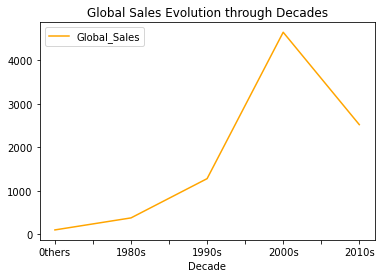

In [ ]:
import matplotlib.pyplot as plt

evolucion = games[['Decade','Global_Sales']].groupby(['Decade']).sum().sort_values('Decade') 
print(evolucion.head(), "\n")
 
evolucion.plot(color = 'orange')
plt.title('Global Sales Evolution through Decades')
ax.set_ylabel("Global_Sales")
    
plt.show()

## Part 2

## 5000 IMD Movies (The Internet Movie Database)

In this project we will focus on the exploratory data analysis of a 5000 movie dataset obtained from the [Internet Movie Database] (https://www.imdb.com).


In [ ]:
import pandas as pd
import numpy as np
import datetime

Loading and viewing the dataset:

In [ ]:
df = pd.read_csv('/Users/javiervillanueva/Downloads/movie_metadata.csv')

In [ ]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### Finding the difference between budget and total box office per director on an annual basis by adding a new column called` diff_gross`.

In [ ]:
limpio = df.copy()
limpio = limpio.dropna(how='any')
limpio.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [ ]:
limpio["diff_gross"] = limpio["gross"] - limpio["budget"]
limpio.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,diff_gross
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


In [ ]:
directors = limpio.groupby('director_name')
directors.sum().sort_values('diff_gross', ascending=False).head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,diff_gross
director_name,,,,,,,,,,,,,,,,,
Steven Spielberg,6526.0,3429.0,350000.0,42157.0,271942.0,4.114233e+09,8273101,421682,17.0,21856.0,1.627901e+09,49934.0,80577.0,188.6,53.25,444000,2.486332e+09
George Lucas,1345.0,655.0,0.0,9929.0,82000.0,1.741418e+09,2494008,153194,10.0,12107.0,3.547770e+08,9956.0,49000.0,37.0,11.18,56000,1.386641e+09
James Cameron,1878.0,1098.0,0.0,4303.0,38780.0,1.948126e+09,3834613,69298,2.0,9064.0,7.485000e+08,13950.0,18479.0,55.4,14.88,103000,1.199626e+09
Joss Whedon,2317.0,606.0,0.0,57279.0,80000.0,1.730887e+09,2696098,270247,10.0,6155.0,7.300000e+08,8044.0,63505.0,31.7,8.40,378000,1.000887e+09
Chris Columbus,1567.0,1398.0,0.0,17183.0,167946.0,1.618708e+09,1959941,241067,21.0,5355.0,6.770000e+08,22014.0,31305.0,73.2,23.85,87000,9.417076e+08


### Finding which directors have obtained the highest number of critic reviews

In [ ]:
directors = limpio.groupby('director_name')
directors.sum().sort_values('num_critic_for_reviews', ascending=False).head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,diff_gross
director_name,,,,,,,,,,,,,,,,,
Steven Spielberg,6526.0,3429.0,350000.0,42157.0,271942.0,4.114233e+09,8273101,421682,17.0,21856.0,1.627901e+09,49934.0,80577.0,188.6,53.25,444000,2.486332e+09
Ridley Scott,4930.0,2419.0,0.0,10167.0,187713.0,1.337772e+09,4683326,257084,17.0,13598.0,1.430000e+09,34048.0,36630.0,120.2,39.45,492911,-9.222831e+07
Tim Burton,4200.0,1759.0,208000.0,46100.0,328705.0,2.071275e+09,3502256,527254,21.0,10789.0,1.247000e+09,32022.0,119460.0,110.9,30.62,244000,8.242755e+08
Clint Eastwood,4172.0,2503.0,304000.0,6753.0,266874.0,1.378321e+09,3029717,344825,9.0,7864.0,7.681000e+08,38043.0,58458.0,136.9,43.65,267705,6.102211e+08
Christopher Nolan,4090.0,1122.0,176000.0,93698.0,150716.0,1.813228e+09,8106282,418363,2.0,19399.0,1.005000e+09,16057.0,109160.0,67.4,18.80,829000,8.082276e+08


### IMDB is known for the disproportion between the evaluation of professional critics and that of the users of the platform; High values ​​mean that professional critics value the film more and vice versa. I will be finding this ratio and adding it in a new column called `critic_ratio`.

In [ ]:
limpio['critic_ratio'] = limpio['num_critic_for_reviews'] / limpio['num_user_for_reviews']
limpio.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,diff_gross,critic_ratio
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,0.236739
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,0.243942
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,0.605634
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,0.301000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,0.626016


### Finding the 20 best directors according to the critic ratio 

In [ ]:
nuevo = limpio.copy()
nuevo.set_index("director_name", inplace=True)

directors_new = nuevo.groupby('director_name')
directors_new.mean().sort_values('critic_ratio', ascending=False).head(20)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,diff_gross,critic_ratio
director_name,,,,,,,,,,,,,,,,,,
Karim Aïnouz,70.0,106.0,19.0,9.0,585.0,20262.0,1738.0,629.0,2.0,10.0,4000000.0,2014.0,29.0,6.1,2.35,278.0,-3979738.0,7.000000
Hans Canosa,365.0,84.0,3.0,446.0,10000.0,379122.0,10143.0,12496.0,0.0,54.0,450000.0,2005.0,651.0,7.1,2.39,0.0,-70878.0,6.759259
Hitoshi Matsumoto,72.0,99.0,17.0,16.0,31.0,22770.0,1658.0,81.0,0.0,12.0,5500000.0,2013.0,17.0,6.1,1.85,543.0,-5477230.0,6.000000
Joseph Dorman,29.0,93.0,0.0,59.0,399.0,906666.0,154.0,660.0,1.0,5.0,500000.0,2011.0,169.0,6.8,16.00,287.0,406666.0,5.800000
Benjamin Dickinson,36.0,97.0,4.0,150.0,446.0,62480.0,1048.0,928.0,1.0,7.0,1000000.0,2015.0,171.0,5.5,2.39,793.0,-937520.0,5.142857
Aki Kaurismäki,205.0,93.0,592.0,36.0,232.0,611709.0,15267.0,391.0,1.0,41.0,3850000.0,2011.0,67.0,7.2,1.85,0.0,-3238291.0,5.000000
Paul Bunnell,94.0,106.0,5.0,356.0,416.0,2436.0,344.0,1611.0,2.0,19.0,2000000.0,2012.0,403.0,5.7,2.35,655.0,-1997564.0,4.947368
Dagur Kári,61.0,99.0,29.0,64.0,117.0,19959.0,3579.0,298.0,2.0,14.0,3800000.0,2009.0,64.0,6.9,2.35,0.0,-3780041.0,4.357143
Anna Muylaert,111.0,112.0,9.0,4.0,61.0,375723.0,7025.0,76.0,1.0,26.0,4000000.0,2015.0,9.0,7.9,2.35,0.0,-3624277.0,4.269231


### Finding how many movies have been made on each genre (acknowledging that a single movie can belong inside more than a single genre) 

First, we need to create a function to translate the genre columm, that currently separates genres with the symbol "|" 

In [ ]:
nuevo['genre_list'] = nuevo['genres'].str.split("|", expand = False) 
  
nuevo.head()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,diff_gross,critic_ratio,genre_list
director_name,,,,,,,,,,,,,,,,,,,,,
James Cameron,Color,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,0.236739,"[Action, Adventure, Fantasy, Sci-Fi]"
Gore Verbinski,Color,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,0.243942,"[Action, Adventure, Fantasy]"
Sam Mendes,Color,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,0.605634,"[Action, Adventure, Thriller]"
Christopher Nolan,Color,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,0.301000,"[Action, Thriller]"
Andrew Stanton,Color,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,0.626016,"[Action, Adventure, Sci-Fi]"


In [ ]:
from collections import Counter
nuevo.reset_index(drop=False).head()

list_of_genres = nuevo['genre_list'].to_list()
l = []

list(map(l.extend, list_of_genres))
Counter(l)

#import numpy as np
#np.asarray(Counter(l))

Counter({'Action': 959,
         'Adventure': 781,
         'Fantasy': 507,
         'Sci-Fi': 496,
         'Thriller': 1117,
         'Romance': 859,
         'Animation': 196,
         'Comedy': 1461,
         'Family': 442,
         'Musical': 96,
         'Mystery': 384,
         'Western': 59,
         'Drama': 1893,
         'History': 149,
         'Sport': 148,
         'Crime': 709,
         'Horror': 392,
         'War': 152,
         'Biography': 239,
         'Music': 151,
         'Documentary': 45,
         'Film-Noir': 1})